In [63]:
import pandas as pd

In [64]:
path = "../data/earthquake_1995-2023.csv"
df = pd.read_csv(path)

In [65]:
df.head(10)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN
5,"M 6.6 - 277 km NNE of Codrington, Antigua and ...",6.6,10-07-2023 20:28,5,4,green,1,802,us,95,2.454000,37.0,mww,10.000,20.0196,-61.0955,"Codrington, Antigua and Barbuda",NaN,NaN
6,M 6.9 - Tonga,6.9,02-07-2023 10:27,4,4,green,1,741,us,136,1.179000,23.0,mww,229.000,-17.8530,-174.9370,Tonga,NaN,NaN
7,M 7.2 - south of the Fiji Islands,7.2,15-06-2023 18:06,8,6,green,1,804,us,85,2.590000,24.0,mww,167.404,-22.9824,-177.2080,the Fiji Islands,NaN,NaN
8,M 6.6 - Panama-Colombia border region,6.6,25-05-2023 03:05,6,6,green,1,733,us,50,2.163000,129.0,mww,10.000,8.8894,-77.1231,Panama-Colombia border region,NaN,Colombia
9,M 7.1 - southeast of the Loyalty Islands,7.1,20-05-2023 01:51,3,4,green,1,777,us,98,2.812000,56.0,mww,35.981,-23.0622,170.4560,the Loyalty Islands,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

- So we have 1000 entries, some of them are None in correspond columns. We have `latitude` and `longitude`. This variables are enough for location deterministic and the variables like `location`, `continent` and `country` are redundant, so we drop them.

- Moreover, it makes to sense suppose that level of `alert` has non-significant information for the `magnitude` values and it will be dropped too.

- See next, we find that `title` has redundant information and so we drop it also.

In [67]:
DROP_COL = ["alert", "location", "continent", "country", "title"]
df = df.drop(DROP_COL, axis=1)

- So next we suppose that in different part of day earthquake of different magnitude could be appear, so we break `data_time` into four bool columns named `morning`, `day`, `evening`, `night`.

- We also break `magType` and `net` into bool columns correspond to unique values.

In [68]:
def time2parts(time_: str) -> str:
    hour_ = int(time_.split(" ")[1].split(":")[0])
    if hour_ >= 6 and hour_ <= 11:
        return "morning"
    elif hour_ >= 12 and hour_ <= 17:
        return "day"
    elif hour_ >= 18 and hour_ <= 23:
        return "evening"
    else:
        return "night"

In [69]:
df["date_time"] = df["date_time"].apply(time2parts)

In [70]:
one_hot = pd.get_dummies(df["date_time"], dtype=int)
df = df.drop(["date_time"], axis=1)
df = df.join(one_hot)
df

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,day,evening,morning,night
0,6.5,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,1,0,0,0
1,6.5,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,0,0,0,1
2,6.6,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,0,0,0,1
3,7.2,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,0,0,1,0
4,7.3,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0,9,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270,1,0,0,0
996,7.7,0,4,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000,0,1,0,0
997,6.9,0,6,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270,0,0,1,0
998,6.6,0,9,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950,0,0,1,0


In [71]:
one_hot = pd.get_dummies(df["magType"], dtype=int)
df = df.drop(["magType"], axis=1)
df = df.join(one_hot)
df

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,depth,...,night,Mi,mb,md,ml,ms,mw,mwb,mwc,mww
0,6.5,7,4,0,657,us,114,7.177000,25.0,192.955,...,0,0,0,0,0,0,0,0,0,1
1,6.5,8,6,0,775,us,92,0.679000,40.0,69.727,...,1,0,0,0,0,0,0,0,0,1
2,6.6,7,5,0,899,us,70,1.634000,28.0,171.371,...,1,0,0,0,0,0,0,0,0,1
3,7.2,6,6,1,860,us,173,0.907000,36.0,32.571,...,0,0,0,0,0,0,0,0,0,1
4,7.3,0,5,1,820,at,79,0.879451,172.8,21.000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0,9,0,776,us,0,0.000000,0.0,11.000,...,0,0,0,0,0,0,0,1,0,0
996,7.7,0,4,0,912,us,0,0.000000,0.0,20.200,...,0,0,0,0,0,0,1,0,0,0
997,6.9,0,6,0,732,us,0,0.000000,0.0,11.200,...,0,0,0,0,0,0,1,0,0,0
998,6.6,0,9,0,670,us,0,0.000000,0.0,14.000,...,0,0,0,0,0,0,1,0,0,0


In [72]:
one_hot = pd.get_dummies(df["net"], dtype=int)
df = df.drop(["net"], axis=1)
df = df.join(one_hot)
df

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,...,at,ci,duputel,hv,nc,nn,official,pt,us,uw
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,...,0,0,0,0,0,0,0,0,1,0
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,...,0,0,0,0,0,0,0,0,1,0
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,...,0,0,0,0,0,0,0,0,1,0
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,...,0,0,0,0,0,0,0,0,1,0
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0,9,0,776,0,0.000000,0.0,11.000,52.6290,...,0,0,0,0,0,0,0,0,1,0
996,7.7,0,4,0,912,0,0.000000,0.0,20.200,-23.0080,...,0,0,0,0,0,0,0,0,1,0
997,6.9,0,6,0,732,0,0.000000,0.0,11.200,-8.3780,...,0,0,0,0,0,0,0,0,1,0
998,6.6,0,9,0,670,0,0.000000,0.0,14.000,40.1490,...,0,0,0,0,0,0,0,0,1,0


In [73]:
df.to_csv("../data/earthquake_main.csv")

- Next we will explore our data

In [74]:
df = pd.read_csv("../data/earthquake_main.csv", index_col=0)
df

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,...,at,ci,duputel,hv,nc,nn,official,pt,us,uw
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,...,0,0,0,0,0,0,0,0,1,0
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,...,0,0,0,0,0,0,0,0,1,0
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,...,0,0,0,0,0,0,0,0,1,0
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,...,0,0,0,0,0,0,0,0,1,0
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0,9,0,776,0,0.000000,0.0,11.000,52.6290,...,0,0,0,0,0,0,0,0,1,0
996,7.7,0,4,0,912,0,0.000000,0.0,20.200,-23.0080,...,0,0,0,0,0,0,0,0,1,0
997,6.9,0,6,0,732,0,0.000000,0.0,11.200,-8.3780,...,0,0,0,0,0,0,0,0,1,0
998,6.6,0,9,0,670,0,0.000000,0.0,14.000,40.1490,...,0,0,0,0,0,0,0,0,1,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   depth      1000 non-null   float64
 9   latitude   1000 non-null   float64
 10  longitude  1000 non-null   float64
 11  day        1000 non-null   int64  
 12  evening    1000 non-null   int64  
 13  morning    1000 non-null   int64  
 14  night      1000 non-null   int64  
 15  Mi         1000 non-null   int64  
 16  mb         1000 non-null   int64  
 17  md         1000 non-null   int64  
 18  ml         1000 non-null   int64  
 19  ms         1000 non-null   int64  
 20  mw         100

In [76]:
df.isna().sum().sum()

0

- So we do not have categorial varibles, only float or int

- We do not have NaN variables and miss values

- Lets looks on graphics

In [77]:
import matplotlib.pyplot as plt

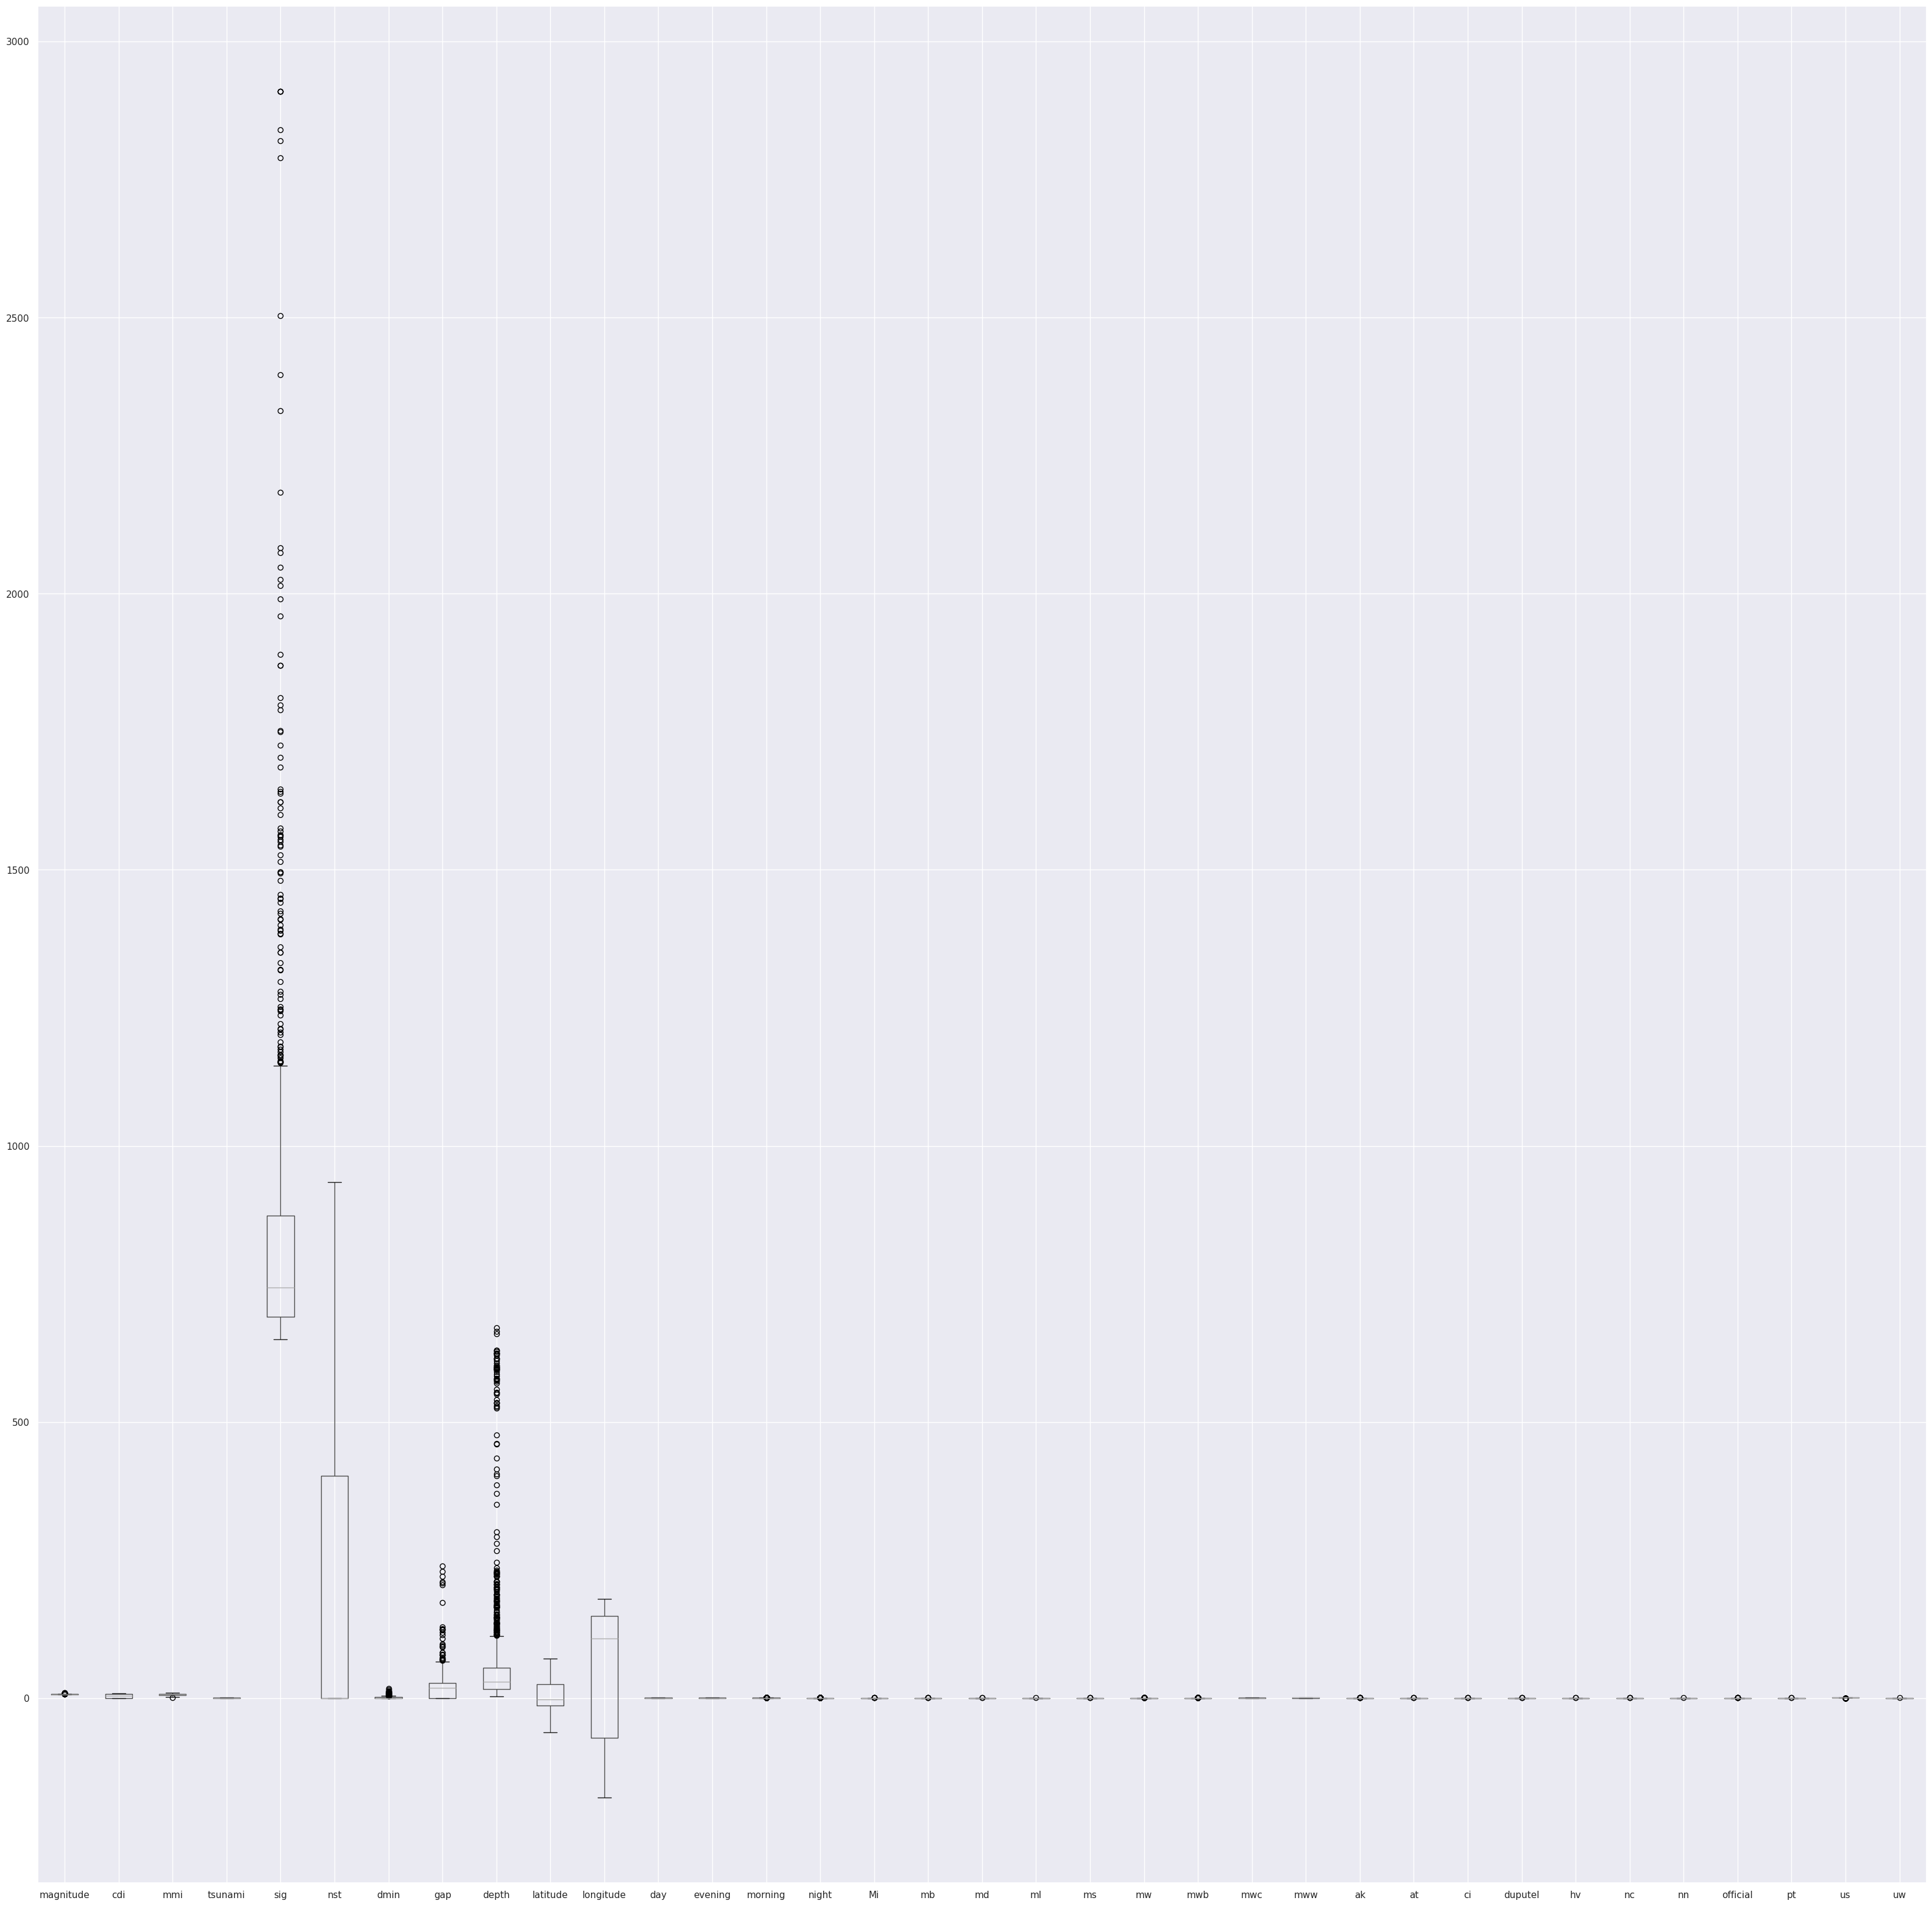

In [80]:
df.boxplot(figsize=(40, 40))
plt.show()

- So there are some outliers, but we do not handle with it, because they not are extremely large for this variables.

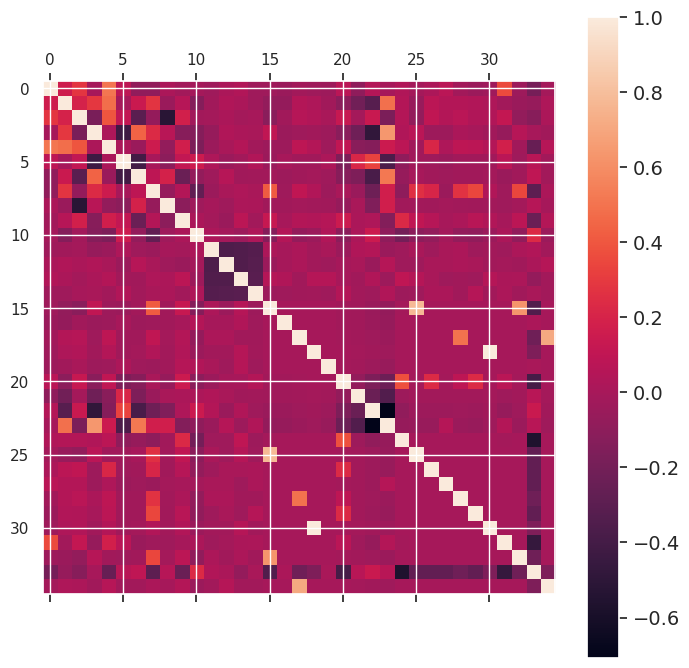

In [81]:
plt.matshow(df.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

- So we see that there are some significant correlation variables
- We will fight with it using random forest to choose more significant varibles

In [82]:
from catboost import CatBoostRegressor

In [83]:
X, target = df.drop(["magnitude"], axis=1), df["magnitude"]

In [84]:
model = CatBoostRegressor()

In [85]:
model.fit(X, target)

Learning rate set to 0.040943
0:	learn: 0.4273987	total: 1.96ms	remaining: 1.96s
1:	learn: 0.4184793	total: 3.63ms	remaining: 1.81s
2:	learn: 0.4100024	total: 5.21ms	remaining: 1.73s
3:	learn: 0.4013044	total: 6.85ms	remaining: 1.7s
4:	learn: 0.3926530	total: 8.69ms	remaining: 1.73s
5:	learn: 0.3850325	total: 10.8ms	remaining: 1.78s
6:	learn: 0.3777841	total: 12.6ms	remaining: 1.78s
7:	learn: 0.3699560	total: 14.1ms	remaining: 1.75s
8:	learn: 0.3628520	total: 17.4ms	remaining: 1.91s
9:	learn: 0.3563411	total: 19.5ms	remaining: 1.93s
10:	learn: 0.3499958	total: 21.6ms	remaining: 1.94s
11:	learn: 0.3432974	total: 25.7ms	remaining: 2.11s
12:	learn: 0.3373184	total: 27.4ms	remaining: 2.08s
13:	learn: 0.3315678	total: 28.9ms	remaining: 2.03s
14:	learn: 0.3257290	total: 30.4ms	remaining: 1.99s
15:	learn: 0.3211241	total: 31.8ms	remaining: 1.95s
16:	learn: 0.3168635	total: 33.3ms	remaining: 1.92s
17:	learn: 0.3127102	total: 36.7ms	remaining: 2s
18:	learn: 0.3081421	total: 40.7ms	remaining: 2.

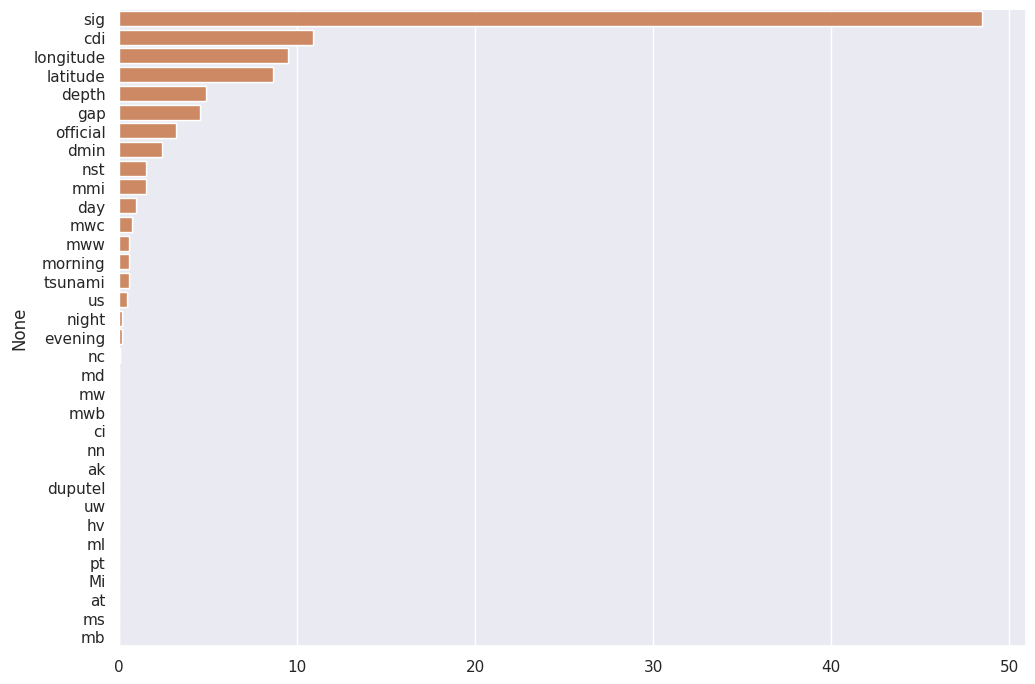

In [87]:
import seaborn as sns
feature_importances = model.feature_importances_
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.show()

In [88]:
important_features = sorted_feature_names[0:10]
important_features

Index(['sig', 'cdi', 'longitude', 'latitude', 'depth', 'gap', 'official',
       'dmin', 'nst', 'mmi'],
      dtype='object')

- So we choose most important features

In [90]:
X = X[important_features]

In [91]:
X

,sig,cdi,longitude,latitude,depth,gap,official,dmin,nst,mmi
0,657,7,167.1580,-13.8814,192.955,25.0,0,7.177000,114,4
1,775,8,-88.1265,12.8140,69.727,40.0,0,0.679000,92,6
2,899,7,-70.3731,-38.1911,171.371,28.0,0,1.634000,70,5
3,860,6,-160.6990,54.3844,32.571,36.0,0,0.907000,173,6
4,820,0,-160.7960,54.4900,21.000,172.8,0,0.879451,79,5
...,...,...,...,...,...,...,...,...,...,...
995,776,0,142.8270,52.6290,11.000,0.0,0,0.000000,0,9
996,912,0,169.9000,-23.0080,20.200,0.0,0,0.000000,0,4
997,732,0,125.1270,-8.3780,11.200,0.0,0,0.000000,0,6
998,670,0,21.6950,40.1490,14.000,0.0,0,0.000000,0,9


In [93]:
target

0      6.5
1      6.5
2      6.6
3      7.2
4      7.3
      ... 
995    7.1
996    7.7
997    6.9
998    6.6
999    7.1
Name: magnitude, Length: 1000, dtype: float64

In [94]:
df = X.join(target)

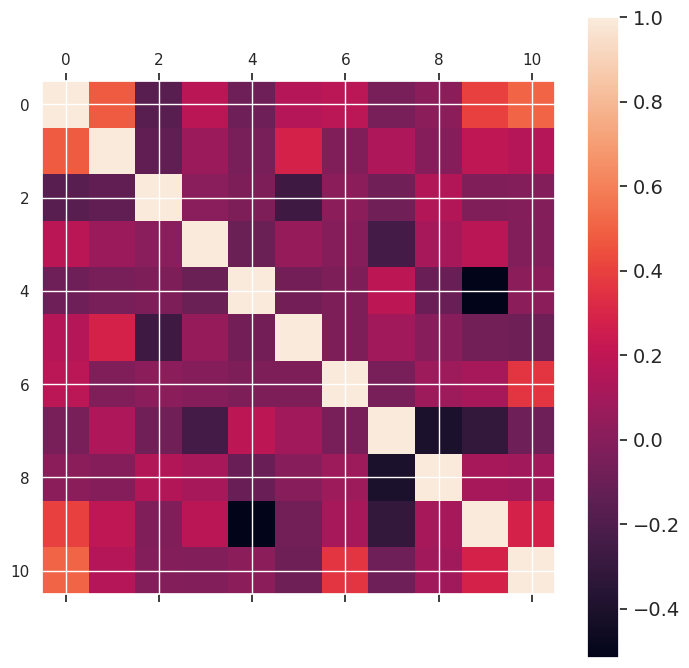

In [95]:
plt.matshow(df.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [96]:
from pandas.plotting import scatter_matrix

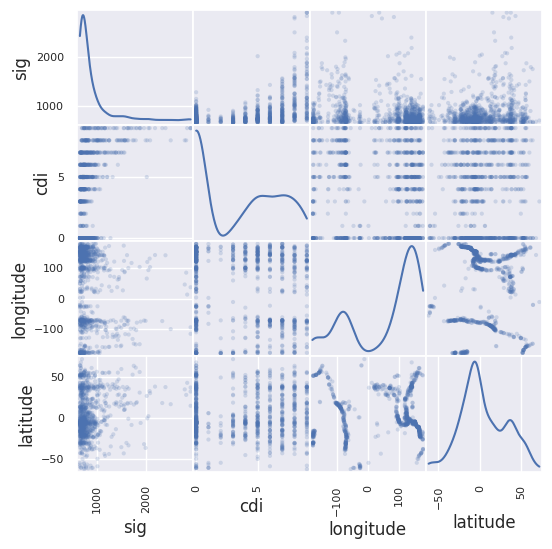

In [97]:
scatter_matrix(df.iloc[:, :4], alpha=0.2, figsize=(6, 6), diagonal="kde")
plt.show()

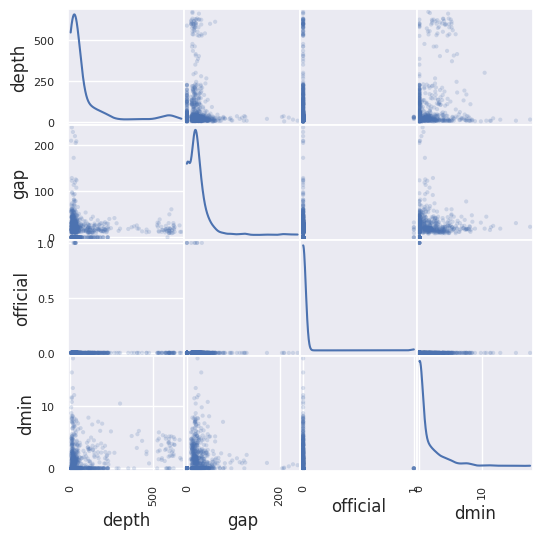

In [98]:
scatter_matrix(df.iloc[:, 4:8], alpha=0.2, figsize=(6, 6), diagonal="kde")
plt.show()

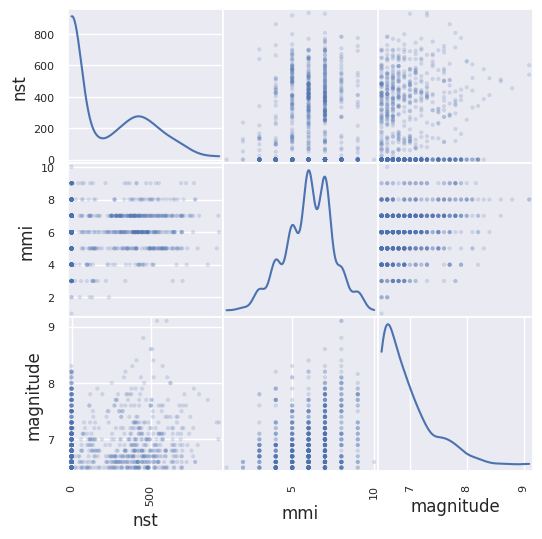

In [99]:
scatter_matrix(df.iloc[:, 8:], alpha=0.2, figsize=(6, 6), diagonal="kde")
plt.show()

- Scatter plots not show some linear dependence
- So we go to fit the model

In [100]:
df.to_csv("../data/train_dataset.csv")